# Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Parameters
n = 20
sigmas = [0.05, 0.3, 0.5, 0.8, 1]
max_p = 5

In [3]:
def run_simulation(sigma):
    train_mse = []
    test_mse = []

    for p in range(1, max_p + 1):
        # Generate data
        np.random.seed(230)
        X = np.random.normal(0, 1, (n, max_p))
        beta = np.array([0.5 + 0.5*j/25 for j in range(1, 26)])
        y = X[:,:p] @ beta[:p] + np.random.normal(0, sigma, n)

        # Split into training and testing sets
        X_train, X_test = X[:n//2, :p], X[n//2:, :p]
        y_train, y_test = y[:n//2], y[n//2:]

        # Train model
        model = LinearRegression().fit(X_train, y_train)

        # Compute MSE
        train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
        test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

    return train_mse, test_mse

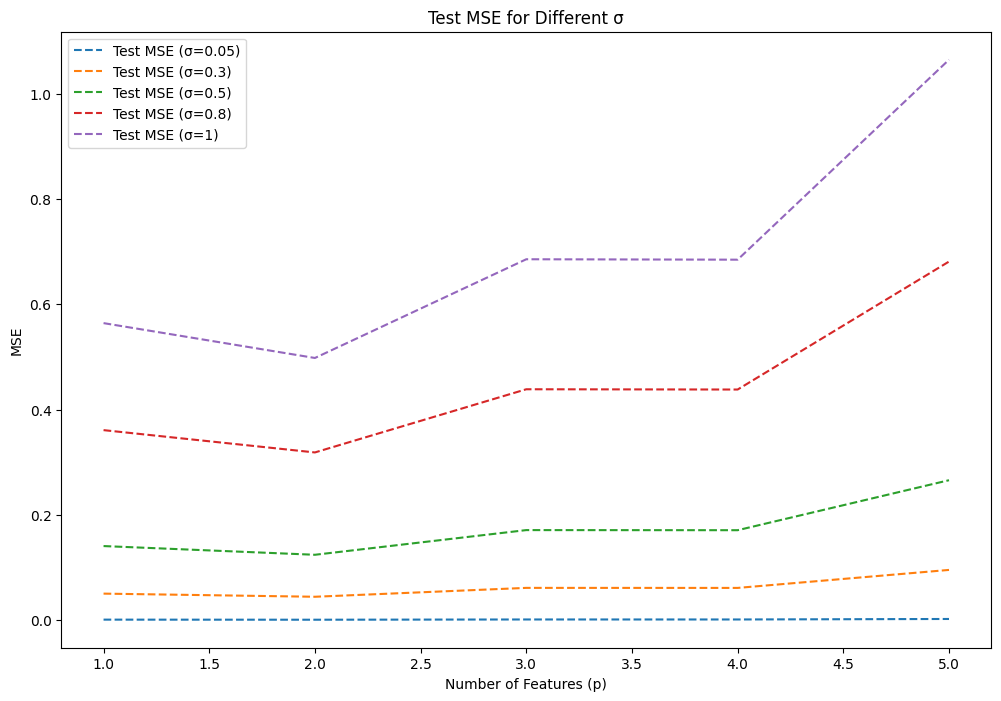

In [4]:
# Run simulation and plot results
plt.figure(figsize=(12, 8))

for sigma in sigmas:
    train_mse, test_mse = run_simulation(sigma)
    plt.plot(range(1, max_p + 1), test_mse, label=f'Test MSE (σ={sigma})', linestyle='dashed')

plt.xlabel('Number of Features (p)')
plt.ylabel('MSE')
plt.title('Test MSE for Different σ')
plt.legend()
plt.show()

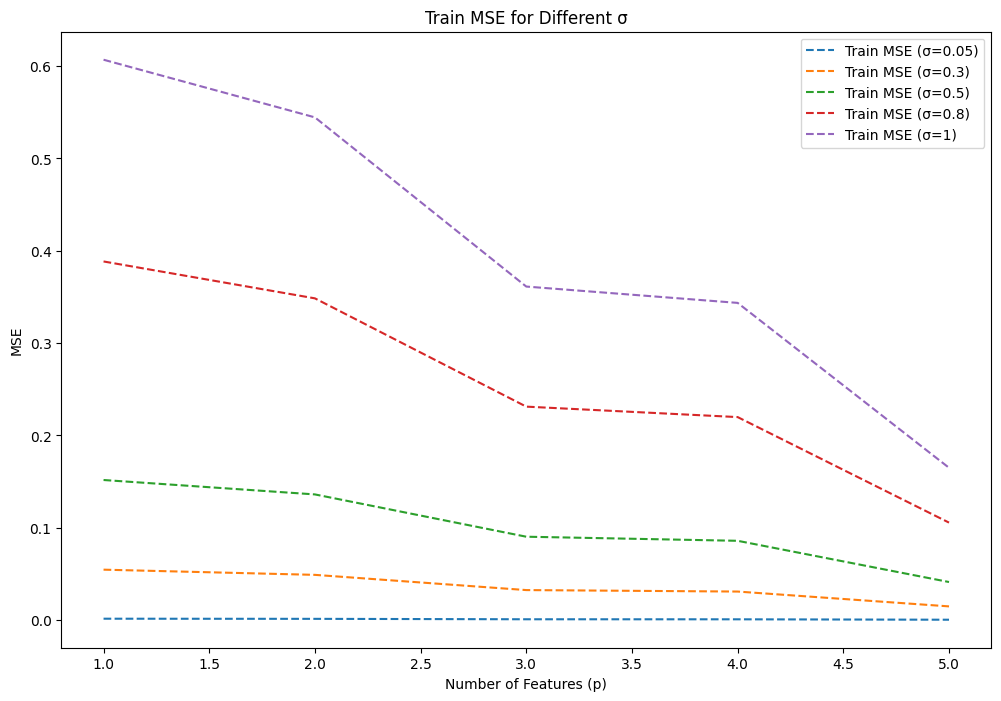

In [5]:
# Run simulation and plot results
plt.figure(figsize=(12, 8))

for sigma in sigmas:
    train_mse, test_mse = run_simulation(sigma)
    plt.plot(range(1, max_p + 1), train_mse, label=f'Train MSE (σ={sigma})', linestyle='dashed')

plt.xlabel('Number of Features (p)')
plt.ylabel('MSE')
plt.title('Train MSE for Different σ')
plt.legend()
plt.show()

The optimal p is 2 for each σ according to test MSE. Train MSE kept decreasing in p and but test MSE increases with p after 2, indicating overfitting.